In [2]:
import pandas as pd 
import numpy as np 
import anndata 
import scanpy as sc

In [3]:
PATH_RNA = "./scRNA/"
PATH_ATAC = "./scATAC/"

In [4]:
# Isl1 branch count, the joint profiling only provide Isl raw count
Isl1_raw_count = pd.read_csv(PATH_RNA + "isl1_raw_count.csv", sep = ",")
Isl1_cell_label = pd.read_csv(PATH_RNA + "isl1.column.cells.csv", sep = ",", index_col=0)
isl1_genes = pd.read_csv(PATH_RNA + "isl1.ow.regions.csv", sep = ",", index_col = 0)
Isl1_raw_count.head()

,c1run1_02_X_isl1.e8.5,c1run1_03_X_isl1.e8.5,c1run1_05_X_isl1.e8.5,c1run1_09_X_isl1.e8.5,c1run1_10_X_isl1.e8.5,c1run1_14_X_isl1.e8.5,c1run1_15_X_isl1.e8.5,c1run1_16_X_isl1.e8.5,c1run1_17_X_isl1.e8.5,c1run1_19_X_isl1.e8.5,...,c1run6_67_X_isl1.e8.5,c1run6_68_X_isl1.e8.5,c1run6_69_X_isl1.e8.5,c1run6_70_X_isl1.e8.5,c1run6_72_X_isl1.e8.5,c1run6_75_X_isl1.e8.5,c1run6_78_X_isl1.e8.5,c1run6_83_X_isl1.e8.5,c1run6_86_X_isl1.e8.5,c1run6_91_X_isl1.e8.5
ENSMUSG00000023944,19998.98,14778.99,10910.97,28683.94,26050.9,20780.98,15158.92,23107.99,21491.98,27217.97,...,22259.97,15596.99,3747.0,8650.99,6495.46,9424.97,13200.98,4574.99,12237.99,5015.00
ENSMUSG00000023942,207.00,63.64,0.00,0.00,2.0,0.00,26.00,2220.91,319.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,33.00,0.00,0.00,98.36
ENSMUSG00000023940,40.00,244.00,2.00,697.00,311.0,62.00,3.00,17.00,45.00,69.00,...,0.00,159.00,147.0,0.00,44.00,651.00,22.00,124.00,0.00,51.00
ENSMUSG00000011960,403.00,538.00,0.00,34.00,1111.0,329.00,360.00,1308.00,355.00,378.00,...,45.00,767.00,10.0,3.00,136.00,65.00,158.00,217.00,22.00,37.00
ENSMUSG00000035919,0.00,0.00,0.00,0.00,72.0,0.00,2.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [5]:
adata = anndata.AnnData(X = Isl1_raw_count.T, obs = Isl1_cell_label, var = isl1_genes)
sc.pp.filter_genes(adata, min_counts = 500)
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes = 600)
adata = adata[:,adata.var["highly_variable"] == True]

In [6]:
X = pd.DataFrame(data = adata.X, columns = adata.var.index, index = adata.obs.index)
# X.to_csv(PATH_RNA + "isl1_processed_count.csv", sep = ",")

In [7]:
Isl1_cell_label.head()

,Cell,Background,Timepoint,X3_prime_bias,aligned_to_genes,intergenic,exonic,X5_prime_bias,secondaryalignments,readsaligned,...,log10_tpm_endogenous_features,is_cell_control,cellcycle,cluster,tsne1,tsne2,dpt,dm1,dm2,dm3
c1run1_02_X_isl1.e8.5,c1run1_02_X_isl1-e8.5,isl1,e8.5,0.51,2022607,1516623,2022607,0.66,1598329,5947381,...,4.459017,False,G1,NaN,-0.607294,10.423404,0.076301,0.025899,0.017457,0.001114
c1run1_03_X_isl1.e8.5,c1run1_03_X_isl1-e8.5,isl1,e8.5,0.52,1592974,1261174,1592974,0.64,1332392,5383416,...,4.536211,False,G1,4.0,-3.566392,2.509205,0.086728,0.028708,-0.001898,0.033400
c1run1_05_X_isl1.e8.5,c1run1_05_X_isl1-e8.5,isl1,e8.5,0.54,1183338,1012203,1183338,0.61,1079343,4438431,...,4.525769,False,G1,5.0,16.874308,24.996956,0.017500,0.035954,0.072335,-0.145645
c1run1_09_X_isl1.e8.5,c1run1_09_X_isl1-e8.5,isl1,e8.5,0.49,1767629,1394725,1767629,0.61,1644726,5626861,...,4.526428,False,G1,NaN,20.404252,22.243679,0.016836,0.034542,0.070061,-0.153562
c1run1_10_X_isl1.e8.5,c1run1_10_X_isl1-e8.5,isl1,e8.5,0.54,1698023,1269914,1698023,0.60,1610451,4976964,...,4.557686,False,G1,NaN,4.865519,25.838531,0.048124,0.031631,-0.045011,-0.096829


In [8]:
clusters = Isl1_cell_label["cluster"]
dpt = Isl1_cell_label["dpt"]
tsne1 = Isl1_cell_label["tsne1"].values
tsne2 = Isl1_cell_label["tsne2"].values
tsne = np.concatenate([tsne1[:,None], tsne2[:,None]], axis = 1)

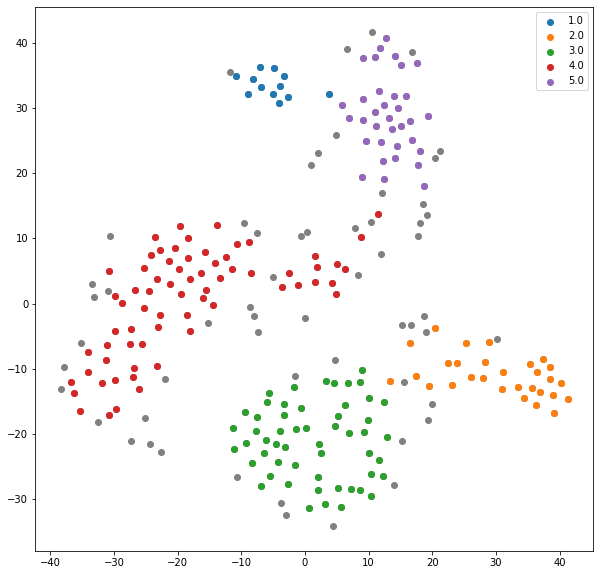

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
ax.scatter(tsne[:,0], tsne[:,1], color = "gray")
for cluster in np.unique(clusters.values):
    if not np.isnan(cluster):
        indices = np.where(clusters.values == cluster)[0]
        ax.scatter(tsne[indices, 0], tsne[indices, 1], label = cluster)
ax.legend()

In [10]:
# read in scATAC-Seq data
bin_count = pd.read_csv(PATH_ATAC + "binary_expr.csv", sep = ",")
bin_count.head()

,E8.5_CPC_p2_069,E8.5_CPC_p2_266,E8.5_CPC_p2_123,E8.5_CPC_p2_167,E8.5_CPC_p2_056,E8.5_CPC_p2_070,E8.5_CPC_p2_325,E8.5_CPC_p2_300,E8.5_CPC_p2_209,E8.5_CPC_p2_287,...,E9.5_CPC_p2_150,E9.5_CPC_p2_197,E9.5_CPC_p2_271,E9.5_CPC_p2_158,E9.5_CPC_p2_041,E9.5_CPC_p2_260,E9.5_CPC_p2_063,E9.5_CPC_p2_081,E9.5_CPC_p2_210,E9.5_CPC_p2_122
aggregated_scATAC_peak_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
aggregated_scATAC_peak_3,1,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
aggregated_scATAC_peak_4,1,0,0,0,1,1,1,0,0,1,...,0,0,0,1,1,0,1,0,1,1
aggregated_scATAC_peak_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
aggregated_scATAC_peak_8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
bin_count.shape

(67368, 695)

In [12]:
cell_label_atac = pd.read_csv(PATH_ATAC + "column.cells.csv", sep = ",")
# two branches:
# cardiomyocyte trajectory 
dpt_cardiac = cell_label_atac["dpt_cardiac"]
# endothelial trajectory
dpt_endo = cell_label_atac["dpt_endo"]
clusters_atac = cell_label_atac[".cluster_5"]

cell_label_atac.head()

,mapping_rate,sequencing_depth,frip,frac_open,mt_content,uniq_frags,dup_level,batch,total_features_by_counts,log10_total_features_by_counts,...,pct_binary_exprs_top_50_features,pct_binary_exprs_top_100_features,pct_binary_exprs_top_200_features,pct_binary_exprs_top_500_features,.cluster_5,dpt_cardiac,dpt_endo,dpt_cl3,dpt_cl3_cl5,dpt_cl4
E8.5_CPC_p2_069,96.69,786696,0.577128,0.252378,0.019627,65284,0.907178,E8.5,21751,4.337499,...,0.241955,0.483910,0.967820,2.419550,3,NaN,NaN,0.537620,0.525075,NaN
E8.5_CPC_p2_266,96.21,764112,0.552194,0.228158,0.046085,63401,0.902394,E8.5,19662,4.293650,...,0.266397,0.532793,1.065587,2.663967,3,NaN,NaN,0.580370,0.569490,NaN
E8.5_CPC_p2_123,95.86,503702,0.550486,0.163307,0.046313,43079,0.899694,E8.5,14070,4.148325,...,0.368351,0.736703,1.473405,3.683513,1,1.354878,NaN,NaN,NaN,1.226441
E8.5_CPC_p2_167,95.05,11411106,0.075704,0.434185,0.001806,1073680,0.894831,E8.5,37408,4.572976,...,0.155415,0.310829,0.621659,1.554146,3,NaN,NaN,0.323131,0.467350,NaN
E8.5_CPC_p2_056,96.38,599927,0.577262,0.195414,0.047465,51053,0.900404,E8.5,16841,4.226394,...,0.307069,0.614137,1.228275,3.070687,1,1.427138,NaN,NaN,NaN,1.260850


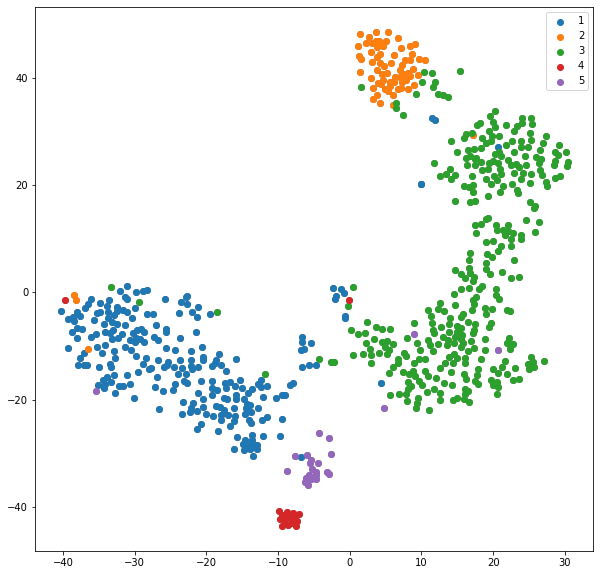

In [13]:
chrom_var = pd.read_csv(PATH_ATAC + "chromvar_dr.csv", sep = ",").values
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
ax.scatter(chrom_var[:,1], chrom_var[:,0], color = "gray")
for cluster in np.unique(clusters_atac.values):
    if not np.isnan(cluster):
        indices = np.where(clusters_atac.values == cluster)[0]
        ax.scatter(chrom_var[indices, 1], chrom_var[indices, 0], label = cluster)
ax.legend()

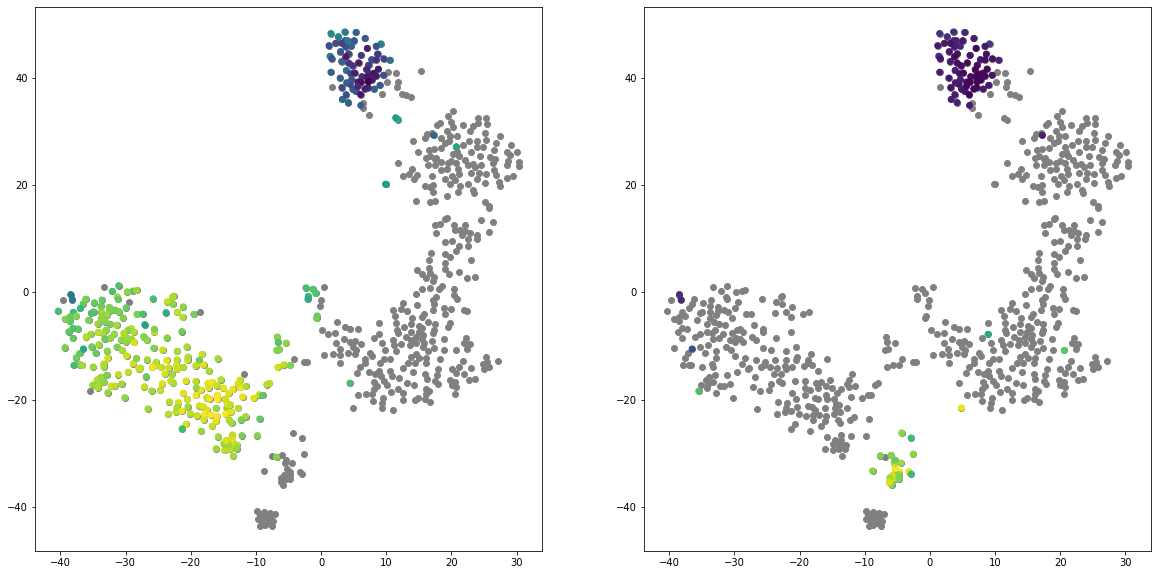

In [14]:
chrom_var = pd.read_csv(PATH_ATAC + "chromvar_dr.csv", sep = ",").values
fig = plt.figure(figsize = (20, 10))
axs = fig.subplots(1,2)
axs[0].scatter(chrom_var[:,1], chrom_var[:,0], color = "gray")
axs[1].scatter(chrom_var[:,1], chrom_var[:,0], color = "gray")

cardiac_lin = np.where(np.isnan(dpt_cardiac.values) == False)[0]
endo_lin = np.where(np.isnan(dpt_endo.values) == False)[0]

axs[0].scatter(chrom_var[cardiac_lin,1], chrom_var[cardiac_lin,0], c = dpt_cardiac.values[cardiac_lin])
axs[1].scatter(chrom_var[endo_lin,1], chrom_var[endo_lin,0], c = dpt_endo.values[endo_lin])

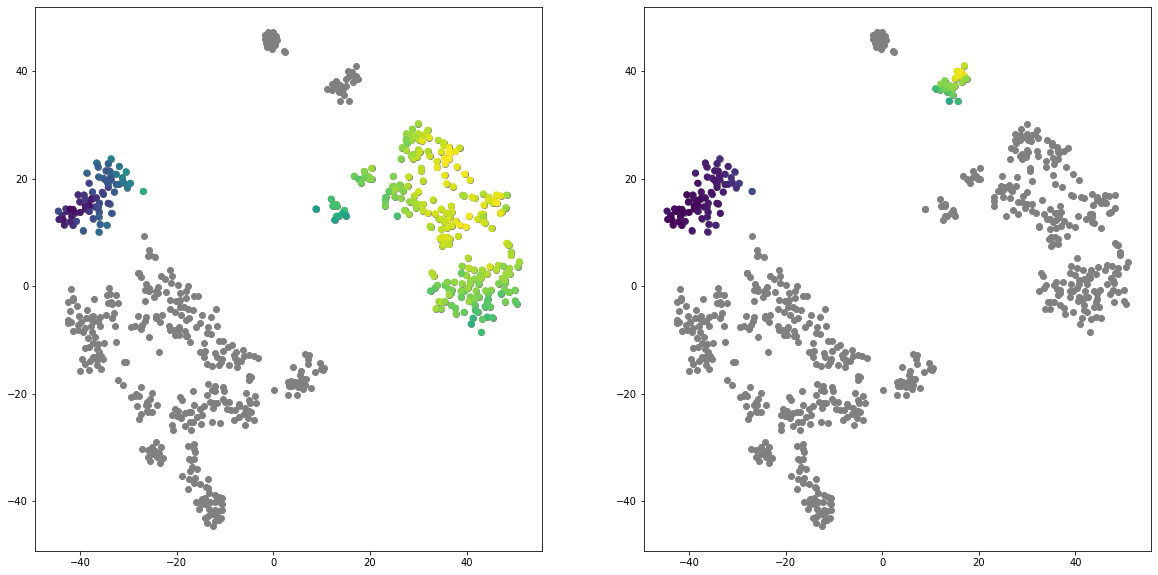

In [17]:
tsne_atac = pd.read_csv(PATH_ATAC + "tsne_dr.csv", sep = ",").values
fig = plt.figure(figsize = (20, 10))
axs = fig.subplots(1,2)
axs[0].scatter(tsne_atac[:,0], tsne_atac[:,1], color = "gray")
axs[1].scatter(tsne_atac[:,0], tsne_atac[:,1], color = "gray")

cardiac_lin = np.where(np.isnan(dpt_cardiac.values) == False)[0]
endo_lin = np.where(np.isnan(dpt_endo.values) == False)[0]

axs[0].scatter(tsne_atac[cardiac_lin,0], tsne_atac[cardiac_lin,1], c = dpt_cardiac.values[cardiac_lin])
axs[1].scatter(tsne_atac[endo_lin,0], tsne_atac[endo_lin,1], c = dpt_endo.values[endo_lin])

In [20]:
regions = pd.read_csv(PATH_ATAC + "row.regions.csv", sep = ",")
regions.head()

,peak_id,peak_chr,peak_start,peak_end,genomic_location,distance,query,gene_id,gene_name,gene_type,...,mean_binary_exprs,log10_mean_binary_exprs,n_cells_by_binary_exprs,pct_dropout_by_binary_exprs,total_binary_exprs,log10_total_binary_exprs,n_cells_binary_exprs,pct_dropout_binary_exprs,reference_cluster,scABC_qvalue
aggregated_scATAC_peak_1,aggregated_scATAC_peak_1,chr1,3191252,3192196,NaN,NaN,"0,1",NaN,NaN,NaN,...,0.106475,0.043942,74,89.352518,74,1.875061,74,89.352518,NaN,NaN
aggregated_scATAC_peak_3,aggregated_scATAC_peak_3,chr1,3670615,3671248,PeakInsideFeature,566.0,0,ENSMUSG00000051951,Xkr4,protein_coding,...,0.469065,0.167041,326,53.093525,326,2.514548,326,53.093525,NaN,NaN
aggregated_scATAC_peak_4,aggregated_scATAC_peak_4,chr1,3671410,3672387,overlapStart,400.0,0,ENSMUSG00000051951,Xkr4,protein_coding,...,0.631655,0.212628,439,36.834532,439,2.643453,439,36.834532,NaN,NaN
aggregated_scATAC_peak_7,aggregated_scATAC_peak_7,chr1,4412307,4412828,upstream,3327.0,0,ENSMUSG00000025900,Rp1,protein_coding,...,0.087770,0.036537,61,91.223022,61,1.792392,61,91.223022,NaN,NaN
aggregated_scATAC_peak_8,aggregated_scATAC_peak_8,chr1,4473817,4474189,upstream,22548.0,1,ENSMUSG00000104238,Gm37587,processed_transcript,...,0.073381,0.030754,51,92.661871,51,1.716003,51,92.661871,NaN,NaN
